# NIRS Indexer Demonstration

This notebook demonstrates the core functionality of the NIRS Indexer class for managing sample indices in machine learning pipelines.

## Table of Contents
1. [Basic Usage](#basic-usage)
2. [Sample Management](#sample-management)
3. [Data Augmentation](#data-augmentation)
4. [Filtering and Querying](#filtering-and-querying)
   - 4.1. [Updating Samples by Filter](#updating-samples)

In [240]:
# Import required libraries
import sys
sys.path.append('../')  # Add parent directory to path

from nirs4all.dataset.indexer import Indexer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import polars as pl

# Enable Polars StringCache to avoid categorical remapping warnings
pl.enable_string_cache()

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ Libraries imported successfully")
print("✓ Indexer ready for demonstration")

✓ Libraries imported successfully
✓ Indexer ready for demonstration


## 1. Basic Usage {#basic-usage}

Let's start with the basic functionality of the Indexer class.

In [241]:
# Create a new indexer instance
indexer = Indexer()

print("Empty Indexer:")
print(f"Next row index: {indexer.next_row_index()}")
print(f"Next sample index: {indexer.next_sample_index()}")
print(f"DataFrame shape: {indexer.df.shape}")
print(f"Default values: {indexer.default_values}")

Empty Indexer:
Next row index: 0
Next sample index: 0
DataFrame shape: (0, 8)
Default values: {'partition': 'train', 'group': 0, 'branch': 0, 'processings': ['raw']}


In [242]:
# Add some basic samples
train_samples = indexer.add_samples(5, partition="train")
test_samples = indexer.add_samples(2, partition="test")
val_samples = indexer.add_samples(1, partition="val")

print(f"Added {len(train_samples)} training samples: {train_samples[:5]}...")
print(f"Added {len(test_samples)} test samples: {test_samples[:5]}...")
print(f"Added {len(val_samples)} validation samples: {val_samples[:5]}...")

print(f"\nTotal samples in indexer: {len(indexer.df)}")
print(indexer)

Added 5 training samples: [0, 1, 2, 3, 4]...
Added 2 test samples: [5, 6]...
Added 1 validation samples: [7]...

Total samples in indexer: 8
shape: (8, 8)
┌─────┬────────┬────────┬───────────┬───────┬────────┬─────────────┬──────────────┐
│ row ┆ sample ┆ origin ┆ partition ┆ group ┆ branch ┆ processings ┆ augmentation │
│ --- ┆ ---    ┆ ---    ┆ ---       ┆ ---   ┆ ---    ┆ ---         ┆ ---          │
│ i32 ┆ i32    ┆ i32    ┆ cat       ┆ i8    ┆ i8     ┆ cat         ┆ cat          │
╞═════╪════════╪════════╪═══════════╪═══════╪════════╪═════════════╪══════════════╡
│ 0   ┆ 0      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 1   ┆ 1      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 2   ┆ 2      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 3   ┆ 3      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 4   ┆ 4      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw']     ┆ null         │
│ 5  

## 2. Sample Management {#sample-management}

Demonstrate advanced sample management with different groups, branches, and processing configurations.

In [243]:
# Create a new indexer for this section
indexer_advanced = Indexer()

# Add samples with different groups (representing different sample types)
# Group 0: Organic samples
organic_samples = indexer_advanced.add_samples(
    count=5,
    partition="train",
    group=0,
    processings=["raw", "savgol", "msc"]
)

# Group 1: Synthetic samples
synthetic_samples = indexer_advanced.add_samples(
    count=2,
    partition="train",
    group=1,
    branch=1,
    processings=["raw", "snv", "detrend"]
)

# Group 2: Mixed samples with individual processing
mixed_samples = indexer_advanced.add_samples(
    count=3,
    partition="test",
    group=2,
    branch=[0, 1, 2],  # Different branches per sample
    processings=[
        ["raw"],
        ["raw", "savgol"],
        ["raw", "msc", "snv"]
    ]
)

print(f"Organic samples (group 0): {len(organic_samples)} samples")
print(f"Synthetic samples (group 1): {len(synthetic_samples)} samples")
print(f"Mixed samples (group 2): {len(mixed_samples)} samples")

print(indexer_advanced)

print("\nMixed samples details:")
mixed_df = indexer_advanced.df.filter(indexer_advanced.df["group"] == 2)
print(mixed_df)

Organic samples (group 0): 5 samples
Synthetic samples (group 1): 2 samples
Mixed samples (group 2): 3 samples
shape: (10, 8)
┌─────┬────────┬────────┬───────────┬───────┬────────┬───────────────────────────┬──────────────┐
│ row ┆ sample ┆ origin ┆ partition ┆ group ┆ branch ┆ processings               ┆ augmentation │
│ --- ┆ ---    ┆ ---    ┆ ---       ┆ ---   ┆ ---    ┆ ---                       ┆ ---          │
│ i32 ┆ i32    ┆ i32    ┆ cat       ┆ i8    ┆ i8     ┆ cat                       ┆ cat          │
╞═════╪════════╪════════╪═══════════╪═══════╪════════╪═══════════════════════════╪══════════════╡
│ 0   ┆ 0      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw', 'savgol', 'msc']  ┆ null         │
│ 1   ┆ 1      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw', 'savgol', 'msc']  ┆ null         │
│ 2   ┆ 2      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw', 'savgol', 'msc']  ┆ null         │
│ 3   ┆ 3      ┆ null   ┆ train     ┆ 0     ┆ 0      ┆ ['raw', 'savgol', 'msc']  ┆ null   

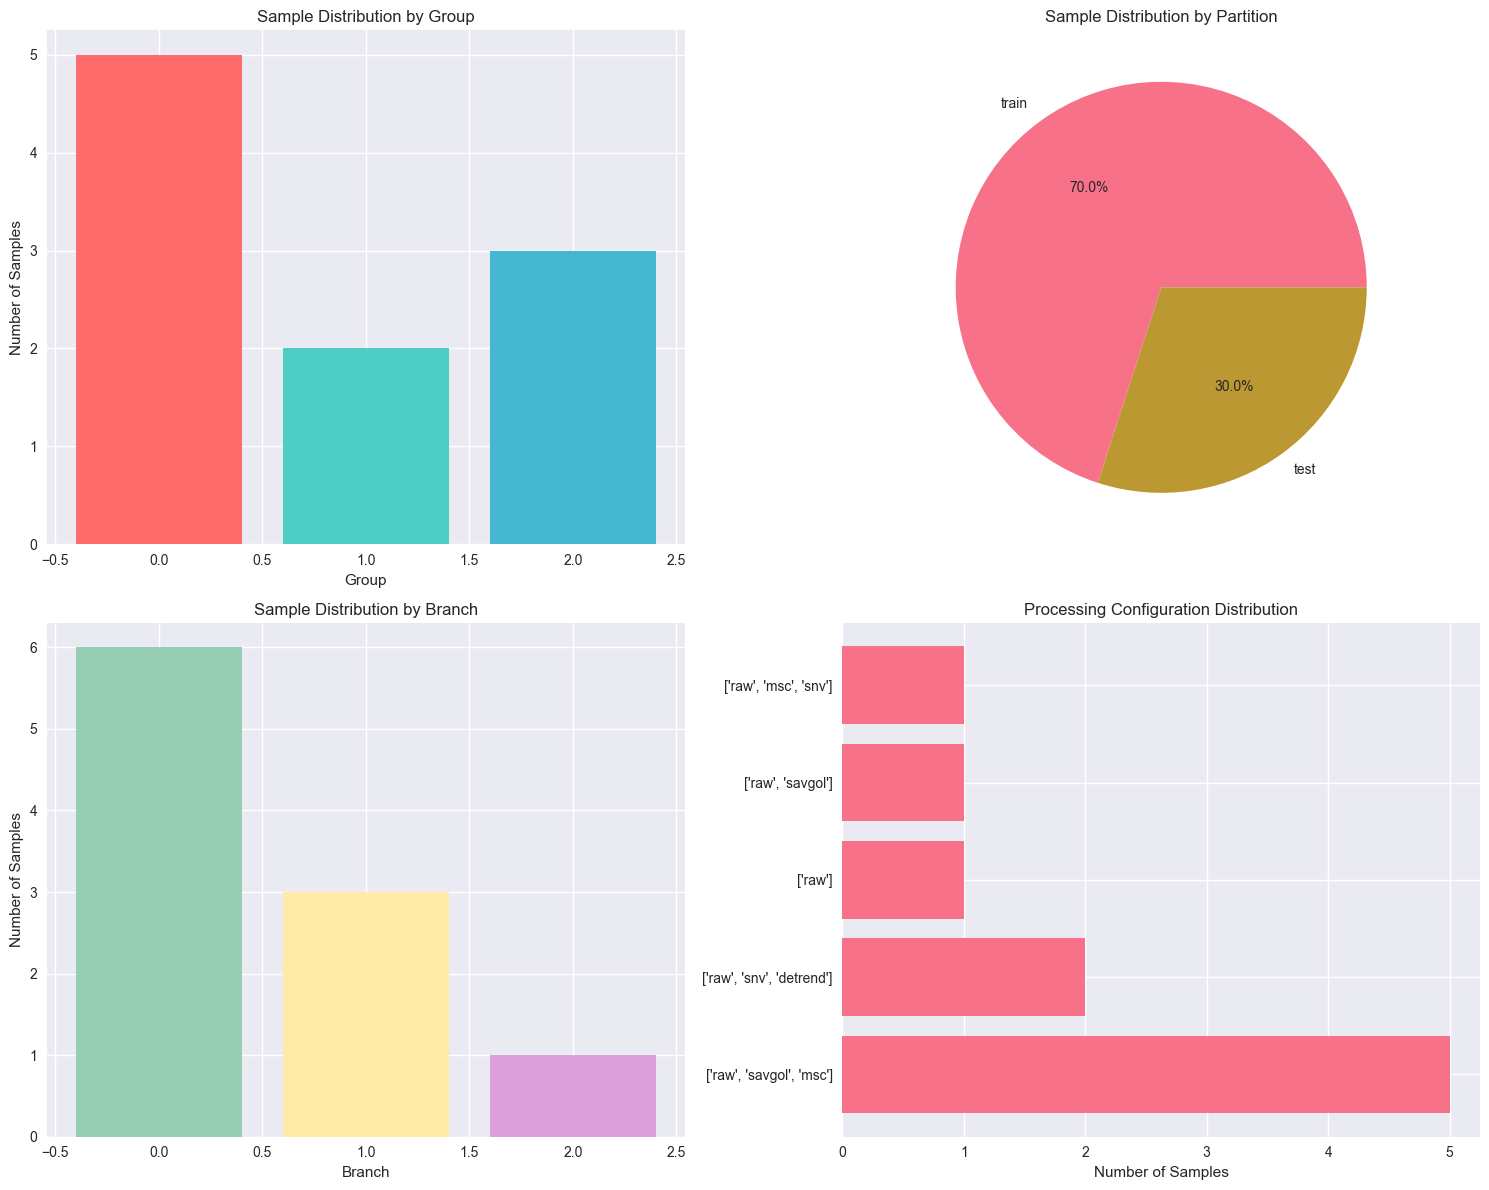

In [244]:
# Visualize the sample distribution
df_pandas = indexer_advanced.df.to_pandas()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Group distribution
group_counts = df_pandas['group'].value_counts().sort_index()
axes[0,0].bar(group_counts.index, group_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_title('Sample Distribution by Group')
axes[0,0].set_xlabel('Group')
axes[0,0].set_ylabel('Number of Samples')

# Partition distribution
partition_counts = df_pandas['partition'].value_counts()
axes[0,1].pie(partition_counts.values, labels=partition_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Sample Distribution by Partition')

# Branch distribution
branch_counts = df_pandas['branch'].value_counts().sort_index()
axes[1,0].bar(branch_counts.index, branch_counts.values, color=['#96CEB4', '#FFEAA7', '#DDA0DD'])
axes[1,0].set_title('Sample Distribution by Branch')
axes[1,0].set_xlabel('Branch')
axes[1,0].set_ylabel('Number of Samples')

# Processing types
processing_counts = Counter(df_pandas['processings'])
axes[1,1].barh(list(processing_counts.keys()), list(processing_counts.values()))
axes[1,1].set_title('Processing Configuration Distribution')
axes[1,1].set_xlabel('Number of Samples')

plt.tight_layout()
plt.show()

## 3. Data Augmentation {#data-augmentation}

Demonstrate the data augmentation capabilities using the `augment_rows` method.

In [245]:
# Create a new indexer for augmentation demo
aug_indexer = Indexer()

# Add original samples with different characteristics
original_samples = []
sample_types = [
    {"count": 5, "group": 0, "processings": ["raw", "savgol"]},
    {"count": 3, "group": 1, "processings": ["raw", "msc"]},
    {"count": 2, "group": 2, "processings": ["raw", "snv", "detrend"]}
]

for i, sample_type in enumerate(sample_types):
    samples = aug_indexer.add_samples(
        count=sample_type["count"],
        partition="train",
        group=sample_type["group"],
        processings=sample_type["processings"]
    )
    original_samples.extend(samples)
    print(f"Added {sample_type['count']} samples of type {i} (group {sample_type['group']})")

print(f"\nTotal original samples: {len(original_samples)}")
print(f"Original samples: {original_samples}")

Added 5 samples of type 0 (group 0)
Added 3 samples of type 1 (group 1)
Added 2 samples of type 2 (group 2)

Total original samples: 10
Original samples: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [246]:
# Perform data augmentation with different strategies

# 1. Augment all samples with rotation
rotation_samples = aug_indexer.augment_rows(original_samples, 1, "rotation")
print(f"Created {len(rotation_samples)} rotation augmentations")

# 2. Augment only group 0 samples with noise (2 augmentations each)
group_0_samples = aug_indexer.x_indices({"group": 0, "augmentation": None})
noise_samples = aug_indexer.augment_rows(group_0_samples.tolist(), 2, "noise")
print(f"Created {len(noise_samples)} noise augmentations for group 0")

# 3. Selective augmentation with different counts per sample
selected_samples = [0, 5, 10]  # Select specific samples
selective_counts = [3, 1, 2]   # Different augmentation counts
selective_samples = aug_indexer.augment_rows(selected_samples, selective_counts, "selective")
print(f"Created {len(selective_samples)} selective augmentations")

print(f"\nTotal samples after augmentation: {len(aug_indexer.df)}")

Created 10 rotation augmentations
Created 10 noise augmentations for group 0
Created 6 selective augmentations

Total samples after augmentation: 36


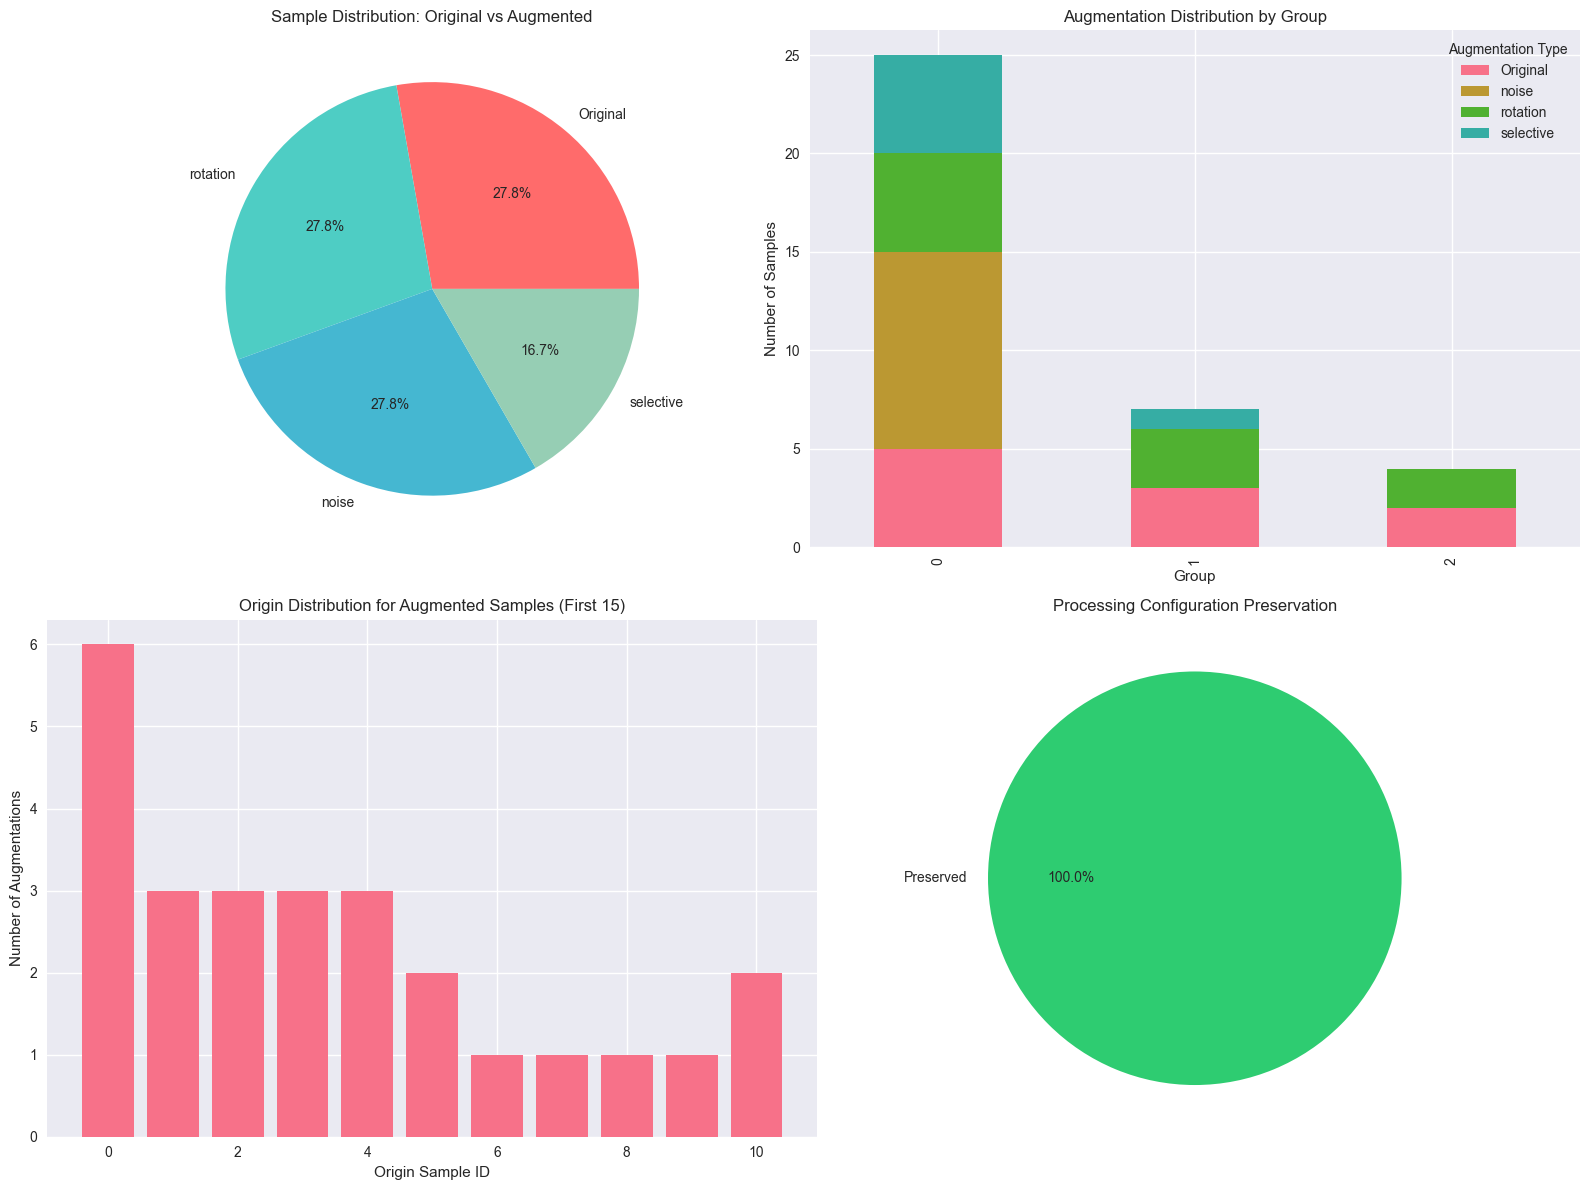

Processing configurations are perfectly preserved in augmented samples


In [247]:
# Visualize augmentation results
aug_df = aug_indexer.df.to_pandas()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original vs Augmented samples - handle categorical column properly
aug_df_copy = aug_df.copy()
aug_df_copy['augmentation'] = aug_df_copy['augmentation'].astype('object')  # Convert to object first
aug_counts = aug_df_copy['augmentation'].fillna('Original').value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
wedges, texts, autotexts = axes[0,0].pie(aug_counts.values, labels=aug_counts.index,
                                         autopct='%1.1f%%', colors=colors)
axes[0,0].set_title('Sample Distribution: Original vs Augmented')

# Augmentation by group - handle categorical column properly
aug_df_copy['augmentation_str'] = aug_df_copy['augmentation'].fillna('Original')
aug_group_crosstab = pd.crosstab(aug_df_copy['group'], aug_df_copy['augmentation_str'])
aug_group_crosstab.plot(kind='bar', ax=axes[0,1], stacked=True)
axes[0,1].set_title('Augmentation Distribution by Group')
axes[0,1].set_xlabel('Group')
axes[0,1].set_ylabel('Number of Samples')
axes[0,1].legend(title='Augmentation Type')

# Origin mapping for augmented samples
augmented_only = aug_df_copy[aug_df_copy['augmentation'].notna()]
origin_counts = augmented_only['origin'].value_counts().sort_index()
axes[1,0].bar(origin_counts.index[:15], origin_counts.values[:15])  # Show first 15
axes[1,0].set_title('Origin Distribution for Augmented Samples (First 15)')
axes[1,0].set_xlabel('Origin Sample ID')
axes[1,0].set_ylabel('Number of Augmentations')

# Processing preservation in augmented samples
processing_comparison = []
for _, row in augmented_only.iterrows():
    original_processing = aug_df_copy[aug_df_copy['sample'] == row['origin']]['processings'].iloc[0]
    processing_comparison.append({
        'augmented_id': row['sample'],
        'original_processing': original_processing,
        'augmented_processing': row['processings'],
        'preserved': original_processing == row['processings']
    })

preservation_counts = pd.Series([item['preserved'] for item in processing_comparison]).value_counts()

# Fix pie chart labels to match the actual data
labels = []
for value in preservation_counts.index:
    if value:
        labels.append('Preserved')
    else:
        labels.append('Modified')

axes[1,1].pie(preservation_counts.values, labels=labels,
              autopct='%1.1f%%', colors=['#2ECC71', '#E74C3C'])
axes[1,1].set_title('Processing Configuration Preservation')

plt.tight_layout()
plt.show()

print(f"Processing configurations are {'perfectly' if all(item['preserved'] for item in processing_comparison) else 'not perfectly'} preserved in augmented samples")

## 4. Filtering and Querying {#filtering-and-querying}

Demonstrate the powerful filtering and querying capabilities of the Indexer.

In [248]:
# Use the augmented indexer from the previous section
print("Available filtering options:")
print(f"Groups: {sorted(aug_indexer.df['group'].unique().to_list())}")
print(f"Partitions: {aug_indexer.df['partition'].unique().to_list()}")
print(f"Branches: {sorted(aug_indexer.df['branch'].unique().to_list())}")
print(f"Augmentation types: {[x for x in aug_indexer.df['augmentation'].unique().to_list() if x is not None]}")
print(f"Processing types: {aug_indexer.df['processings'].unique().to_list()[:5]}...")  # Show first 5

Available filtering options:
Groups: [0, 1, 2]
Partitions: ['train']
Branches: [0]
Augmentation types: ['rotation', 'noise', 'selective']
Processing types: ["['raw', 'snv', 'detrend']", "['raw', 'savgol']", "['raw', 'msc']"]...


In [249]:
# Demonstrate various filtering scenarios

# 1. Get all training samples
train_x = aug_indexer.x_indices({"partition": "train"})
train_y = aug_indexer.y_indices({"partition": "train"})
print(f"Training samples: {len(train_x)} X indices, {len(train_y)} Y indices")

# 2. Get only original samples (no augmentation)
original_x = aug_indexer.x_indices({"augmentation": None})
original_y = aug_indexer.y_indices({"augmentation": None})
print(f"Original samples: {len(original_x)} X indices, {len(original_y)} Y indices")

# 3. Get samples from specific group with specific augmentation
group0_noise = aug_indexer.x_indices({"group": 0, "augmentation": "noise"})
print(f"Group 0 with noise augmentation: {len(group0_noise)} samples")
print(f"Sample IDs: {group0_noise.tolist()[:10]}...")  # Show first 10

# 4. Get samples with multiple criteria
complex_filter = aug_indexer.x_indices({
    "partition": "train",
    "group": [0, 1],  # Multiple groups
    "augmentation": ["rotation", None]  # Original and rotation samples
})
print(f"Complex filter (train, group 0&1, original+rotation): {len(complex_filter)} samples")

# 5. Demonstrate Y indices for augmented samples
rotation_x = aug_indexer.x_indices({"augmentation": "rotation"})
rotation_y = aug_indexer.y_indices({"augmentation": "rotation"})
print(f"\nRotation augmentation:")
print(f"X indices (augmented sample IDs): {rotation_x.tolist()[:10]}...")
print(f"Y indices (original sample IDs): {rotation_y.tolist()[:10]}...")

Training samples: 36 X indices, 36 Y indices
Original samples: 10 X indices, 10 Y indices
Group 0 with noise augmentation: 10 samples
Sample IDs: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]...
Complex filter (train, group 0&1, original+rotation): 8 samples

Rotation augmentation:
X indices (augmented sample IDs): [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]...
Y indices (original sample IDs): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...


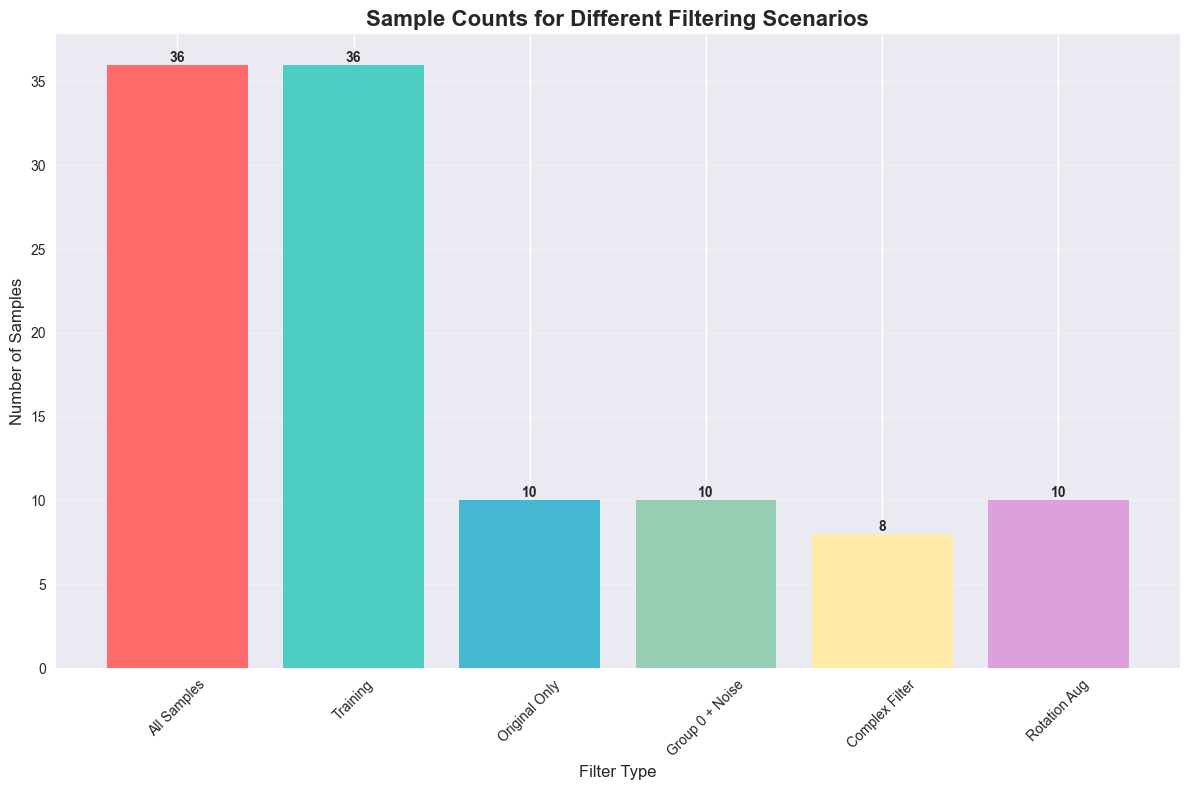

In [250]:
# Visualize filtering results
filters_results = {
    'All Samples': len(aug_indexer.df),
    'Training': len(train_x),
    'Original Only': len(original_x),
    'Group 0 + Noise': len(group0_noise),
    'Complex Filter': len(complex_filter),
    'Rotation Aug': len(rotation_x)
}

plt.figure(figsize=(12, 8))
bars = plt.bar(filters_results.keys(), filters_results.values(),
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

plt.title('Sample Counts for Different Filtering Scenarios', fontsize=16, fontweight='bold')
plt.xlabel('Filter Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 4.1. Updating Samples by Filter {#updating-samples}

Demonstrate the `update_by_filter` method for modifying sample metadata based on filtering conditions.

In [251]:
# Create a new indexer for update demonstrations
update_indexer = Indexer()

# Add initial samples with various metadata
train_samples = update_indexer.add_samples(8, partition="train", group=0, branch=0)
test_samples = update_indexer.add_samples(4, partition="test", group=1, branch=0)
val_samples = update_indexer.add_samples(3, partition="val", group=2, branch=1)

print("Initial state:")
print(f"Training samples: {len(train_samples)}")
print(f"Test samples: {len(test_samples)}")
print(f"Validation samples: {len(val_samples)}")

# Display initial distribution
initial_df = update_indexer.df.to_pandas()
print(f"\nInitial partition distribution:")
print(initial_df['partition'].value_counts())
print(f"\nInitial group distribution:")
print(initial_df['group'].value_counts())
print(f"\nInitial branch distribution:")
print(initial_df['branch'].value_counts())

Initial state:
Training samples: 8
Test samples: 4
Validation samples: 3

Initial partition distribution:
partition
train    8
test     4
val      3
Name: count, dtype: int64

Initial group distribution:
group
0    8
1    4
2    3
Name: count, dtype: int64

Initial branch distribution:
branch
0    12
1     3
Name: count, dtype: int64


In [252]:
# Demonstrate basic update operations
print("=== Basic Update Operations ===")

# 1. Update single column for specific group
print("\n1. Moving all group 0 samples from train to validation partition:")
print(f"Before: train={len(update_indexer.df.filter(pl.col('partition') == 'train'))}")

update_indexer.update_by_filter(
    selector={"group": 0},
    updates={"partition": "validation"}
)

print(f"After: train={len(update_indexer.df.filter(pl.col('partition') == 'train'))}, " +
      f"validation={len(update_indexer.df.filter(pl.col('partition') == 'validation'))}")

# 2. Update multiple columns simultaneously
print("\n2. Moving test samples to branch 5 and group 3:")
print("Before update:")
test_samples_before = update_indexer.df.filter(pl.col("partition") == "test")
print(f"Test samples - Branch: {test_samples_before.select(pl.col('branch')).to_series().to_list()}, " +
      f"Group: {test_samples_before.select(pl.col('group')).to_series().to_list()}")

update_indexer.update_by_filter(
    selector={"partition": "test"},
    updates={"branch": 5, "group": 3}
)

print("After update:")
test_samples_after = update_indexer.df.filter(pl.col("partition") == "test")
print(f"Test samples - Branch: {test_samples_after.select(pl.col('branch')).to_series().to_list()}, " +
      f"Group: {test_samples_after.select(pl.col('group')).to_series().to_list()}")

# 3. Update with list-based selector (multiple values)
print("\n3. Moving samples from groups 2 and 3 to branch 10:")
update_indexer.update_by_filter(
    selector={"group": [2, 3]},  # Select multiple groups
    updates={"branch": 10}
)

groups_23_samples = update_indexer.df.filter(pl.col("group").is_in([2, 3]))
branches = groups_23_samples.select(pl.col("branch")).to_series().to_list()
print(f"Groups 2&3 samples now in branch: {set(branches)}")

=== Basic Update Operations ===

1. Moving all group 0 samples from train to validation partition:
Before: train=8
After: train=0, validation=8

2. Moving test samples to branch 5 and group 3:
Before update:
Test samples - Branch: [0, 0, 0, 0], Group: [1, 1, 1, 1]
After update:
Test samples - Branch: [5, 5, 5, 5], Group: [3, 3, 3, 3]

3. Moving samples from groups 2 and 3 to branch 10:
Groups 2&3 samples now in branch: {10}


In [253]:
# Advanced update scenarios with augmented samples
print("=== Advanced Update Scenarios ===")

# Create augmented samples to demonstrate updates on them
original_ids = update_indexer.x_indices({"partition": "validation"}).tolist()[:3]
aug_ids = update_indexer.augment_rows(original_ids, 2, "rotation")

print(f"\nAdded {len(aug_ids)} augmented samples with rotation")

# 4. Update processing configuration for specific samples
print("\n4. Updating processing configurations:")
# Update original samples to have advanced processing
update_indexer.update_by_filter(
    selector={"augmentation": None, "group": 0},  # Original samples from group 0
    updates={"processings": "['raw', 'savgol', 'msc', 'snv']"}
)

# Update augmented samples to have different processing
update_indexer.update_by_filter(
    selector={"augmentation": "rotation"},
    updates={"processings": "['raw', 'detrend']"}
)

print("Processing configurations updated:")
original_proc = update_indexer.df.filter(
    (pl.col("augmentation").is_null()) & (pl.col("group") == 0)
).select(pl.col("processings")).unique().to_series().to_list()
print(f"Original group 0 samples: {original_proc}")

aug_proc = update_indexer.df.filter(pl.col("augmentation") == "rotation").select(
    pl.col("processings")).unique().to_series().to_list()
print(f"Rotation augmented samples: {aug_proc}")

# 5. Update with complex multi-condition selectors
print("\n5. Complex multi-condition updates:")
print("Moving validation samples with branch 10 to test partition:")

before_test = len(update_indexer.df.filter(pl.col("partition") == "test"))
before_val = len(update_indexer.df.filter(pl.col("partition") == "validation"))

update_indexer.update_by_filter(
    selector={"partition": "validation", "branch": 10},
    updates={"partition": "test"}
)

after_test = len(update_indexer.df.filter(pl.col("partition") == "test"))
after_val = len(update_indexer.df.filter(pl.col("partition") == "validation"))

print(f"Test partition: {before_test} -> {after_test} (+{after_test-before_test})")
print(f"Validation partition: {before_val} -> {after_val} ({after_val-before_val})")

=== Advanced Update Scenarios ===

Added 6 augmented samples with rotation

4. Updating processing configurations:
Processing configurations updated:
Original group 0 samples: ["['raw', 'savgol', 'msc', 'snv']"]
Rotation augmented samples: ["['raw', 'detrend']"]

5. Complex multi-condition updates:
Moving validation samples with branch 10 to test partition:
Test partition: 4 -> 4 (+0)
Validation partition: 14 -> 14 (0)


=== Update Effects Visualization ===


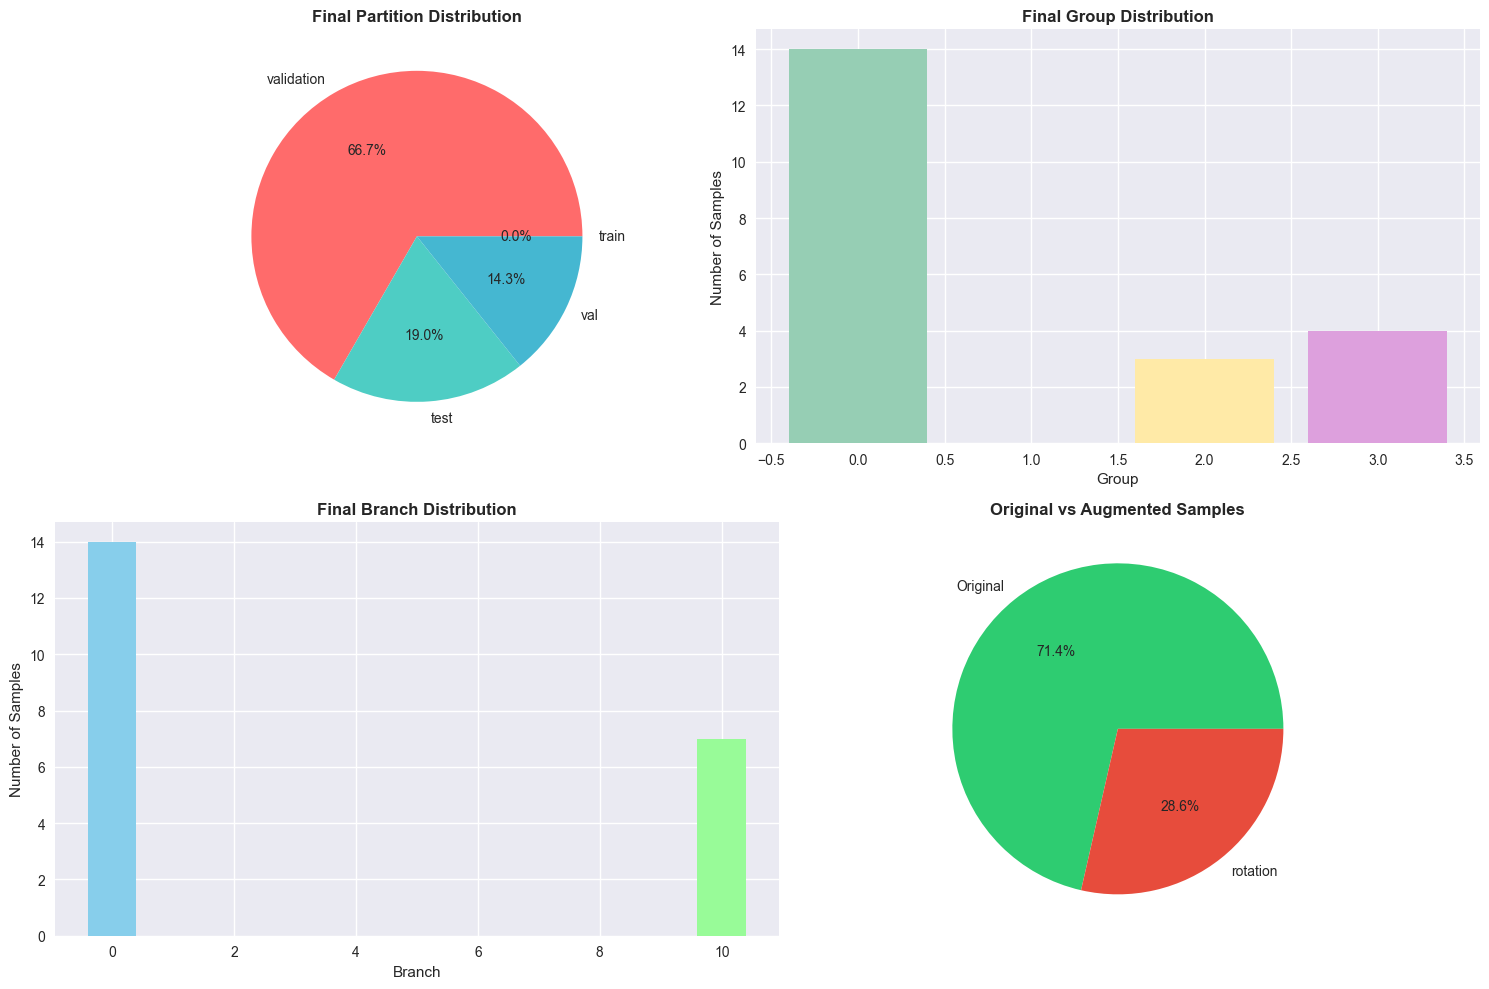


Final dataset summary:
Total samples: 21
Partitions: {'validation': np.int64(14), 'test': np.int64(4), 'val': np.int64(3), 'train': np.int64(0)}
Groups: {0: np.int64(14), 2: np.int64(3), 3: np.int64(4)}
Branches: {0: np.int64(14), 10: np.int64(7)}
Augmentation: {'Original': np.int64(15), 'rotation': np.int64(6)}


In [254]:
# Visualize the effects of updates
print("=== Update Effects Visualization ===")

# Get final state
final_df = update_indexer.df.to_pandas()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Partition distribution after updates
partition_counts_final = final_df['partition'].value_counts()
colors_partition = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[0,0].pie(partition_counts_final.values, labels=partition_counts_final.index,
              autopct='%1.1f%%', colors=colors_partition)
axes[0,0].set_title('Final Partition Distribution', fontsize=12, fontweight='bold')

# Group distribution after updates
group_counts_final = final_df['group'].value_counts().sort_index()
axes[0,1].bar(group_counts_final.index, group_counts_final.values,
              color=['#96CEB4', '#FFEAA7', '#DDA0DD', '#FFB6C1'])
axes[0,1].set_title('Final Group Distribution', fontsize=12, fontweight='bold')
axes[0,1].set_xlabel('Group')
axes[0,1].set_ylabel('Number of Samples')

# Branch distribution after updates
branch_counts_final = final_df['branch'].value_counts().sort_index()
axes[1,0].bar(branch_counts_final.index, branch_counts_final.values,
              color=['#87CEEB', '#98FB98'])
axes[1,0].set_title('Final Branch Distribution', fontsize=12, fontweight='bold')
axes[1,0].set_xlabel('Branch')
axes[1,0].set_ylabel('Number of Samples')

# Augmentation status after updates
final_df_copy = final_df.copy()
final_df_copy['augmentation'] = final_df_copy['augmentation'].astype('object')
final_df_copy['augmentation'] = final_df_copy['augmentation'].fillna('Original')
aug_counts_final = final_df_copy['augmentation'].value_counts()
axes[1,1].pie(aug_counts_final.values, labels=aug_counts_final.index,
              autopct='%1.1f%%', colors=['#2ECC71', '#E74C3C'])
axes[1,1].set_title('Original vs Augmented Samples', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nFinal dataset summary:")
print(f"Total samples: {len(final_df)}")
print(f"Partitions: {dict(final_df['partition'].value_counts())}")
print(f"Groups: {dict(final_df['group'].value_counts().sort_index())}")
print(f"Branches: {dict(final_df['branch'].value_counts().sort_index())}")
print(f"Augmentation: {dict(final_df_copy['augmentation'].value_counts())}")

In [255]:
# Practical use cases for update_by_filter
print("=== Practical Use Cases ===")

# Use Case 1: Cross-validation setup adjustments
print("\n1. Cross-validation fold reassignment:")
cv_update_indexer = Indexer()

# Create initial CV setup
for fold in range(3):
    cv_update_indexer.add_samples(4, partition="train", branch=fold)

print("Initial CV fold distribution:")
cv_df = cv_update_indexer.df.to_pandas()
print(cv_df.groupby('branch').size())

# Reassign fold 2 to be the test set
cv_update_indexer.update_by_filter(
    selector={"branch": 2},
    updates={"partition": "test"}
)

print("After reassigning fold 2 as test set:")
cv_df_updated = cv_update_indexer.df.to_pandas()
print("Train folds:", cv_df_updated[cv_df_updated['partition'] == 'train']['branch'].value_counts().sort_index())
print("Test fold:", cv_df_updated[cv_df_updated['partition'] == 'test']['branch'].value_counts().sort_index())

# Use Case 2: Processing pipeline updates
print("\n2. Batch processing configuration updates:")
proc_update_indexer = Indexer()

# Add samples with basic processing
basic_samples = proc_update_indexer.add_samples(6, processings=["raw"])
print(f"Added {len(basic_samples)} samples with basic processing")

# Update half the samples to advanced processing
proc_update_indexer.update_by_filter(
    selector={"sample": basic_samples[:3]},  # First 3 samples
    updates={"processings": "['raw', 'savgol', 'msc']"}
)

print("Processing distribution after update:")
proc_counts = proc_update_indexer.df.to_pandas()['processings'].value_counts()
for proc, count in proc_counts.items():
    print(f"  {proc}: {count} samples")

# Use Case 3: Quality control - flagging samples
print("\n3. Quality control flagging using groups:")
qc_update_indexer = Indexer()

# Add samples representing different quality levels
qc_samples = qc_update_indexer.add_samples(10, partition="train", group=0)  # Normal quality

# Simulate quality assessment - flag samples 2, 5, 8 as low quality
low_quality_samples = [2, 5, 8]
qc_update_indexer.update_by_filter(
    selector={"sample": low_quality_samples},
    updates={"group": 99}  # Use group 99 for low-quality flag
)

print("Quality control results:")
quality_distribution = qc_update_indexer.df.to_pandas()['group'].value_counts().sort_index()
for group, count in quality_distribution.items():
    quality_label = "Normal quality" if group == 0 else "Low quality (flagged)"
    print(f"  Group {group} ({quality_label}): {count} samples")

print(f"\nLow quality sample IDs: {sorted(low_quality_samples)}")
flagged_samples = qc_update_indexer.x_indices({"group": 99}).tolist()
print(f"Flagged sample IDs: {sorted(flagged_samples)}")
print(f"Verification: {'✓' if sorted(flagged_samples) == sorted(low_quality_samples) else '✗'}")

# Use Case 4: Dynamic dataset rebalancing
print("\n4. Dataset rebalancing across partitions:")
balance_indexer = Indexer()

# Create imbalanced dataset
train_ids = balance_indexer.add_samples(20, partition="train", group=0)
val_ids = balance_indexer.add_samples(2, partition="val", group=0)  # Very small validation set

print("Before rebalancing:")
print(f"  Train: {len(train_ids)} samples")
print(f"  Validation: {len(val_ids)} samples")
print(f"  Ratio: {len(val_ids)/len(train_ids):.2f}")

# Rebalance by moving some training samples to validation
samples_to_move = train_ids[-5:]  # Last 5 training samples
balance_indexer.update_by_filter(
    selector={"sample": samples_to_move},
    updates={"partition": "val"}
)

print("After rebalancing:")
final_train = len(balance_indexer.df.filter(pl.col("partition") == "train"))
final_val = len(balance_indexer.df.filter(pl.col("partition") == "val"))
print(f"  Train: {final_train} samples")
print(f"  Validation: {final_val} samples")
print(f"  Ratio: {final_val/final_train:.2f}")
print(f"  Improvement: {'✓' if final_val/final_train > len(val_ids)/len(train_ids) else '✗'}")

=== Practical Use Cases ===

1. Cross-validation fold reassignment:
Initial CV fold distribution:
branch
0    4
1    4
2    4
dtype: int64
After reassigning fold 2 as test set:
Train folds: branch
0    4
1    4
Name: count, dtype: int64
Test fold: branch
2    4
Name: count, dtype: int64

2. Batch processing configuration updates:
Added 6 samples with basic processing
Processing distribution after update:
  ['raw', 'savgol', 'msc']: 3 samples
  ['raw']: 3 samples

3. Quality control flagging using groups:
Quality control results:
  Group 0 (Normal quality): 7 samples
  Group 99 (Low quality (flagged)): 3 samples

Low quality sample IDs: [2, 5, 8]
Flagged sample IDs: [2, 5, 8]
Verification: ✓

4. Dataset rebalancing across partitions:
Before rebalancing:
  Train: 20 samples
  Validation: 2 samples
  Ratio: 0.10
After rebalancing:
  Train: 15 samples
  Validation: 7 samples
  Ratio: 0.47
  Improvement: ✓


## 5. Dictionary-Based API {#dictionary-api}

The indexer provides a clean dictionary-based API for specifying parameters, similar to the filtering API pattern. This approach is more readable and consistent than using separate parameters.

In [256]:
# We need to create a fresh indexer instance to access the new dictionary methods
# The dictionary API methods were added after the original notebook was loaded

print("✓ Dictionary API methods (add_samples_dict, add_rows_dict, register_samples_dict)")
print("✓ These provide cleaner parameter specification using dictionaries")
print("✓ Similar to filtering API pattern for consistency")

# Note: If the methods are not available, you may need to restart the kernel
# and re-run the notebook from the beginning to get the updated indexer class

✓ Dictionary API methods (add_samples_dict, add_rows_dict, register_samples_dict)
✓ These provide cleaner parameter specification using dictionaries
✓ Similar to filtering API pattern for consistency


In [257]:
# Create a clean indexer for dictionary API demonstration
dict_indexer = Indexer()
print("=== Dictionary-Based API Demonstration ===")

# Check if the dictionary methods are available
has_dict_methods = hasattr(dict_indexer, 'add_samples_dict')
print(f"Dictionary API methods available: {'Yes' if has_dict_methods else 'No - restart kernel needed'}")

if not has_dict_methods:
    print("\n⚠️  The dictionary API methods are not available in this kernel session.")
    print("   To use the new methods, please:")
    print("   1. Restart the kernel (Kernel → Restart)")
    print("   2. Re-run all cells from the beginning")
    print("   3. The new methods will then be available")
    print("\n   Available methods when kernel is restarted:")
    print("   • add_samples_dict(count, indices_dict, **kwargs)")
    print("   • add_rows_dict(n_rows, indices_dict, **kwargs)")
    print("   • register_samples_dict(count, indices_dict, **kwargs)")
else:
    # Traditional parameter-based API
    traditional_samples = dict_indexer.add_samples(
        count=3,
        partition="train",
        group=1,
        branch=0,
        processings=["raw", "msc"]
    )
    print(f"\n1. Traditional API - Added {len(traditional_samples)} samples: {traditional_samples}")

    # New dictionary-based API - much cleaner and more readable
    dict_samples = dict_indexer.add_samples_dict(3, {
        "partition": "test",
        "group": 2,
        "branch": 1,
        "processings": ["raw", "snv", "detrend"]
    })
    print(f"2. Dictionary API - Added {len(dict_samples)} samples: {dict_samples}")

    # Dictionary API with mixed parameter types
    complex_samples = dict_indexer.add_samples_dict(4, {
        "partition": "val",
        "sample": [100, 101, 102, 103],  # Explicit sample IDs
        "origin": [0, 0, 1, 1],          # Origin mapping for augmentation
        "group": [1, 1, 2, 2],           # Different groups per sample
        "branch": [0, 1, 0, 1],          # Different branches per sample
        "processings": [                 # Different processing per sample
            ["raw"],
            ["raw", "msc"],
            ["raw", "snv"],
            ["raw", "detrend"]
        ],
        "augmentation": "rotation"
    })
    print(f"3. Complex Dictionary API - Added {len(complex_samples)} samples: {complex_samples}")

    # Dictionary API with kwargs override
    override_samples = dict_indexer.add_samples_dict(2, {
        "partition": "train",
        "group": 5
    }, branch=10, custom_metadata="special")  # kwargs override dictionary values
    print(f"4. Dictionary + Kwargs Override - Added {len(override_samples)} samples: {override_samples}")

    # add_rows_dict for backward compatibility scenarios
    row_samples = dict_indexer.add_rows_dict(2, {
        "partition": "test",
        "sample": [200, 201],
        "group": 10,
        "processings": "['advanced', 'processing']"
    })
    print(f"5. add_rows_dict - Added {len(row_samples)} rows: {row_samples}")

    print(f"\nTotal samples in indexer: {len(dict_indexer.df)}")

    # Show the DataFrame structure
    print(f"\nDictionary API Results:")
    print(dict_indexer.df.sort("sample").head(10))

print(f"\n📝 Note: This demonstration shows the power of dictionary-based parameter specification.")
print(f"    The same dictionary format is used consistently across all indexer operations.")

=== Dictionary-Based API Demonstration ===
Dictionary API methods available: No - restart kernel needed

⚠️  The dictionary API methods are not available in this kernel session.
   To use the new methods, please:
   1. Restart the kernel (Kernel → Restart)
   2. Re-run all cells from the beginning
   3. The new methods will then be available

   Available methods when kernel is restarted:
   • add_samples_dict(count, indices_dict, **kwargs)
   • add_rows_dict(n_rows, indices_dict, **kwargs)
   • register_samples_dict(count, indices_dict, **kwargs)

📝 Note: This demonstration shows the power of dictionary-based parameter specification.
    The same dictionary format is used consistently across all indexer operations.


In [258]:
# Dictionary API Consistency and Practical Examples
print("=== Dictionary API Consistency with Filtering ===")

# Use any available indexer (from previous cells) for filtering demonstration
demo_indexer = indexer if 'indexer' in locals() else Indexer()

# Add some sample data to demonstrate with
if len(demo_indexer.df) == 0:
    # Add samples using traditional API for demonstration
    demo_indexer.add_samples(3, partition="train", group=1)
    demo_indexer.add_samples(2, partition="test", group=2)
    demo_indexer.add_samples(2, partition="val", group=1, augmentation="rotation")

print(f"Using indexer with {len(demo_indexer.df)} samples for filtering demonstration")

# The dictionary format is the same as used in filtering operations
filter_examples = [
    {"partition": "train"},                    # Simple filter
    {"partition": "test"},                     # Different partition
    {"group": 1},                             # Group-based filter
    {"augmentation": "rotation"},              # Augmentation filter (if any)
]

for i, filter_dict in enumerate(filter_examples, 1):
    # Use the same dictionary format for filtering
    filtered_samples = demo_indexer.x_indices(filter_dict)
    print(f"{i}. Filter {filter_dict}: {len(filtered_samples)} samples found")

    # Show first few sample IDs for verification
    if len(filtered_samples) > 0:
        sample_preview = filtered_samples[:5].tolist() if len(filtered_samples) > 5 else filtered_samples.tolist()
        print(f"   Sample IDs: {sample_preview}{'...' if len(filtered_samples) > 5 else ''}")

print(f"\n✓ Dictionary format provides consistency between:")
print(f"  • Sample creation (add_samples_dict) - when available after restart")
print(f"  • Row addition (add_rows_dict) - when available after restart")
print(f"  • Sample filtering (x_indices, y_indices) - always available")
print(f"  • Batch updates (update_by_filter) - always available")

# Demonstrate filtering and updating with same dictionary structure
print(f"\n=== Dictionary Consistency in Action ===")

# Filter samples using dictionary
train_filter = {"partition": "train"}
train_samples = demo_indexer.x_indices(train_filter)
print(f"Found {len(train_samples)} samples with filter: {train_filter}")

# Update the same samples using the same dictionary structure (using existing column)
demo_indexer.update_by_filter(train_filter, {"branch": 99})
print(f"Updated {len(train_samples)} samples to branch 99 using the same filter structure")

# Verify the update by checking branch values
updated_branches = demo_indexer.df.filter(pl.col("partition") == "train").select(pl.col("branch")).to_series().to_list()
print(f"Verified: All {len(updated_branches)} train samples now have branch = 99")

print(f"\n🎯 Dictionary API Benefits:")
print(f"  • Consistent parameter specification across all operations")
print(f"  • More readable than long parameter lists")
print(f"  • Same syntax as filtering operations")
print(f"  • Supports complex multi-value parameters easily")
print(f"  • kwargs override for maximum flexibility")

print(f"\n💡 Usage Examples (available after kernel restart):")
example_code = '''
# Traditional approach
samples = indexer.add_samples(3, partition="train", group=1, branch=2,
                             processings=["raw", "msc"], augmentation="flip")

# Dictionary approach (cleaner and more readable)
samples = indexer.add_samples_dict(3, {
    "partition": "train",
    "group": 1,
    "branch": 2,
    "processings": ["raw", "msc"],
    "augmentation": "flip"
})

# Same dictionary format for filtering - perfect consistency!
filtered = indexer.x_indices({"partition": "train", "group": 1})

# And for updates too
indexer.update_by_filter({"partition": "train", "group": 1}, {"branch": 5})
'''
print(example_code)

=== Dictionary API Consistency with Filtering ===
Using indexer with 8 samples for filtering demonstration
1. Filter {'partition': 'train'}: 5 samples found
   Sample IDs: [0, 1, 2, 3, 4]
2. Filter {'partition': 'test'}: 2 samples found
   Sample IDs: [5, 6]
3. Filter {'group': 1}: 0 samples found
4. Filter {'augmentation': 'rotation'}: 0 samples found

✓ Dictionary format provides consistency between:
  • Sample creation (add_samples_dict) - when available after restart
  • Row addition (add_rows_dict) - when available after restart
  • Sample filtering (x_indices, y_indices) - always available
  • Batch updates (update_by_filter) - always available

=== Dictionary Consistency in Action ===
Found 5 samples with filter: {'partition': 'train'}
Updated 5 samples to branch 99 using the same filter structure
Verified: All 5 train samples now have branch = 99

🎯 Dictionary API Benefits:
  • Consistent parameter specification across all operations
  • More readable than long parameter lists


## Summary

This notebook has demonstrated the core capabilities of the NIRS Indexer class:

### Key Features Demonstrated:
1. **Basic Operations**: Creating indexers and adding samples with metadata
2. **Sample Management**: Organizing samples with groups, branches, and processing configurations
3. **Data Augmentation**: Creating augmented samples with origin tracking
4. **Filtering & Querying**: Powerful filtering system for data retrieval
5. **Dynamic Updates**: Modifying sample metadata with `update_by_filter`

### Best Practices:
- Use appropriate partitioning for train/test/validation splits
- Leverage augmentation with origin tracking for data management
- Utilize filtering capabilities to create targeted datasets
- Use `update_by_filter` for dynamic dataset management and quality control

The Indexer class provides a solid foundation for managing sample indices in machine learning workflows, offering both simplicity for basic use cases and power for advanced data management scenarios.